<a href="https://colab.research.google.com/github/Samkhan705279/British-Airways-Data-Science-project/blob/main/task2_british_airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
5,1,Internet,RoundTrip,3.0,48.0,20.0,Thu,AKLDEL,New Zealand,1.0,0.0,1.0,5.52,0.0
6,3,Internet,RoundTrip,201.0,33.0,6.0,Thu,AKLDEL,New Zealand,1.0,0.0,1.0,5.52,0.0
7,2,Internet,RoundTrip,238.0,19.0,14.0,Mon,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
8,1,Internet,RoundTrip,80.0,22.0,4.0,Mon,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
9,1,Mobile,RoundTrip,378.0,30.0,12.0,Sun,AKLDEL,India,0.0,0.0,0.0,5.52,0.0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         16382 non-null  int64  
 1   sales_channel          16382 non-null  object 
 2   trip_type              16382 non-null  object 
 3   purchase_lead          16381 non-null  float64
 4   length_of_stay         16381 non-null  float64
 5   flight_hour            16381 non-null  float64
 6   flight_day             16381 non-null  object 
 7   route                  16381 non-null  object 
 8   booking_origin         16381 non-null  object 
 9   wants_extra_baggage    16381 non-null  float64
 10  wants_preferred_seat   16381 non-null  float64
 11  wants_in_flight_meals  16381 non-null  float64
 12  flight_duration        16381 non-null  float64
 13  booking_complete       16381 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.7+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [11]:
df["booking_complete"].unique()

array([ 0.,  1., nan])

In [13]:
# Convert 'nan' string to actual NaN
df['booking_complete'] = pd.to_numeric(df['booking_complete'], errors='coerce')

# Remove rows where 'booking_complete' is NaN
df = df.dropna(subset=['booking_complete'])

# Print the updated DataFrame
df["booking_complete"].unique()

array([0., 1.])

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([ 6.,  3.,  4.,  1.,  7.,  2.,  5., nan])

In [14]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000
mean,1.472315,86.618094,40.267932,8.891032,3.830169,0.767413,0.306453,0.487211,7.753264,0.106526
std,0.865451,86.515951,40.534052,5.482142,1.993878,0.422494,0.461034,0.499852,1.426825,0.308519
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,23.000000,21.000000,5.000000,2.000000,1.000000,0.000000,0.000000,6.620000,0.000000
50%,1.000000,56.000000,28.000000,9.000000,4.000000,1.000000,0.000000,0.000000,8.580000,0.000000
75%,2.000000,120.000000,42.000000,12.000000,6.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,641.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.booking_complete.value_counts()

0.0    14636
1.0     1745
Name: booking_complete, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname] = label_encoder.fit_transform(X[colname])

In [17]:

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores


route                    0.047336
booking_origin           0.041501
flight_duration          0.014154
wants_extra_baggage      0.004496
purchase_lead            0.004443
num_passengers           0.003238
length_of_stay           0.002646
wants_in_flight_meals    0.002322
flight_hour              0.000864
sales_channel            0.000000
trip_type                0.000000
flight_day               0.000000
wants_preferred_seat     0.000000
Name: MI Scores, dtype: float64

In [20]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


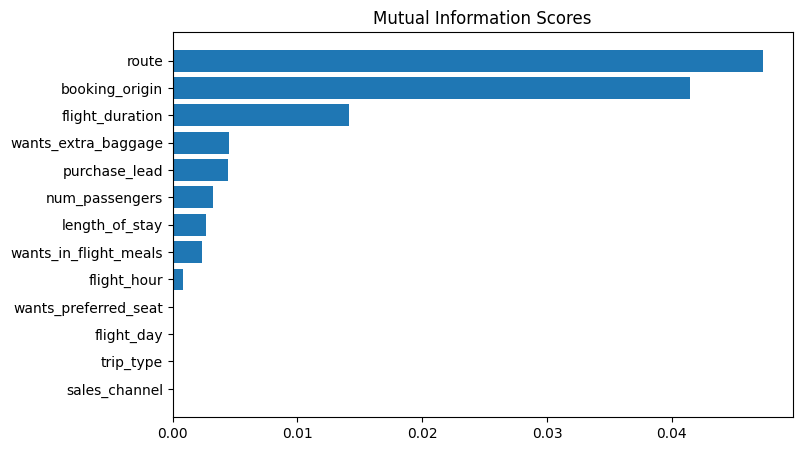

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [34]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, test_X, train_y, val_y, test_y)

In [26]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,X_test,y_train,y_val,y_test= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)
pred=forest_model.predict(X_test)
print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))
print('on test data\n')
a1=accuracy_score(y_test,pred)*100
r1=roc_auc_score(y_test,pred)
print('ACCURACY: ',a1)
print('AUC score: ',r1)



ACCURACY:  87.88526090936833
AUC score:  0.5519393521709166
on test data

ACCURACY:  88.55311355311355
AUC score:  0.5487919111772324


In [48]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,X_test,y_train,y_val,y_test= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)
pred=forest_model.predict(X_test)
print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print(f'AUC score: {roc_auc_score(y_val,preds)}\n')
print('on test data')
a2=accuracy_score(y_test,pred)*100
r2=roc_auc_score(y_test,pred)
print('ACCURACY: ',a2)
print('AUC score: ',r2)


ACCURACY:  88.49557522123894
AUC score: 0.5391307144498048

on test data
ACCURACY:  89.68253968253968
AUC score:  0.5377671249230882


In [49]:

from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete

X_train,X_val,X_test,y_train,y_val,y_test= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
pred=xgb_model.predict(X_test)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))
print(f'ACCURACY: {accuracy_score(y_val, prediction_xgb)*100}\n')
print('on test data')
a3=accuracy_score(y_test,pred)*100
r3=roc_auc_score(y_test,pred)
print('ACCURACY: ',a3)
print('AUC score: ',r3)

AUC score:  0.5134155754651964
ACCURACY: 88.4650595056454

on test data
ACCURACY:  89.71306471306471
AUC score:  0.5126364897007099


In [45]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,X_test,y_train,y_val,y_test= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
pred=xgb_model.predict(X_test)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))
print(f'ACCURACY: {accuracy_score(y_val, prediction_xgb)*100}\n')
print('on test data')
a4=accuracy_score(y_test,pred)*100
r4=roc_auc_score(y_test,pred)
print('ACCURACY: ',a4)
print('AUC score: ',r4)

AUC score:  0.5313852515506547
ACCURACY: 87.94629234055539

on test data
ACCURACY:  89.37728937728939
AUC score:  0.5254153235804613


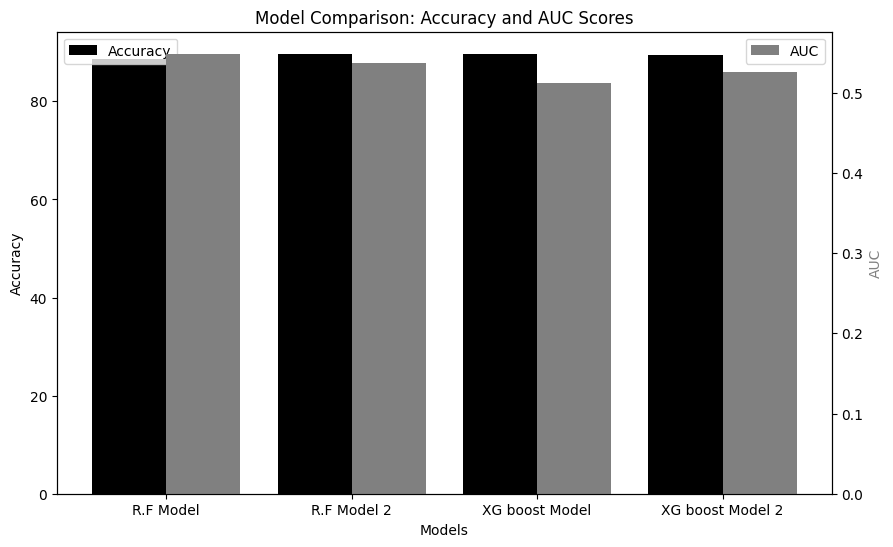

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
models = ['R.F Model', 'R.F Model 2', 'XG boost Model', 'XG boost Model 2']
accuracy_scores = [a1,a2,a3,a4]
auc_scores = [r1,r2,r3,r4]

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy scores
ax1.bar(np.arange(len(models)) - 0.2, accuracy_scores, width=0.4, label='Accuracy', color='black', align='center')

# Create a second y-axis for AUC scores
ax2 = ax1.twinx()
ax2.bar(np.arange(len(models)) + 0.2, auc_scores, width=0.4, label='AUC', color='grey', align='center')

# Set labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('AUC', color='grey')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Comparison: Accuracy and AUC Scores')

# Show the plot
plt.show()


In [62]:
data=df

In [63]:
data["booking_origin"].value_counts(ascending=False)

Australia          8086
Malaysia           2201
South Korea         956
New Zealand         925
Japan               688
                   ... 
Solomon Islands       1
Bulgaria              1
Tonga                 1
Slovakia              1
Egypt                 1
Name: booking_origin, Length: 84, dtype: int64

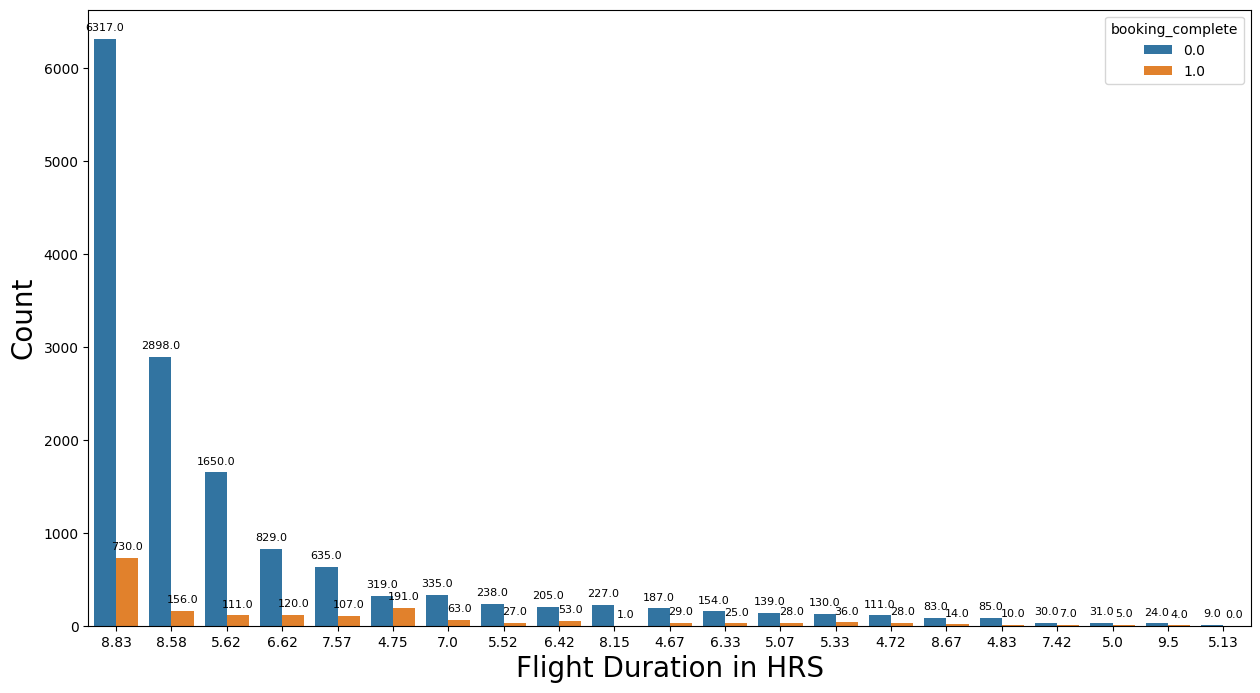

In [64]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=data ,order=data.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')

it seems like most customers with flight duration >= 8.83 are more like to left the booking incomplete